# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

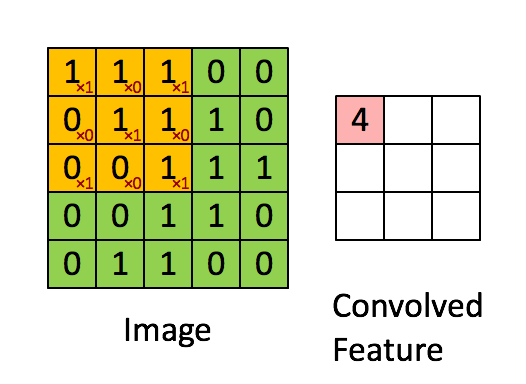

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

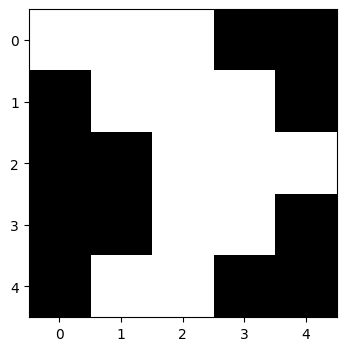

In [3]:
# Visualizing the input.
plt.imshow(I)

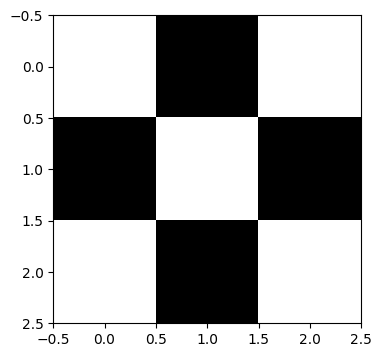

In [4]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [6]:
import numpy as np

def convolution(img, filter):
    """
    Function performs convolution operations.
    Arguments:
    img (ndarray): Numpy array of an input image.
    filter (ndarray): Numpy array of an input filter.

    Returns:
    filter_map (ndarray): Resulting feature map after convolution.
    """
    input_size = img.shape[0]  # Assuming square matrix
    filter_size = filter.shape[0]  # Assuming square filter

    # Compute output dimensions
    output_dimension = (input_size - filter_size) + 1
    filter_map = np.zeros((output_dimension, output_dimension))

    # Perform convolution operation
    for i in range(output_dimension):
        for j in range(output_dimension):
            region = img[i:i+filter_size, j:j+filter_size]  # Extract region
            filter_map[i, j] = np.sum(region * filter)  # Element-wise multiplication & sum

    return filter_map


In [7]:
img = convolution(I, K)

In [8]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


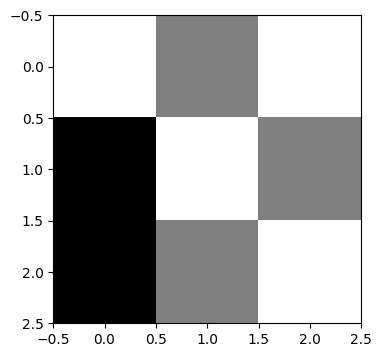

In [9]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [24]:
data_dir = "/content/drive/MyDrive/FruitinAmazon/train"

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,  # Path to the directory containing training images
    image_size=(224, 224),  # Resize all images to this size
    batch_size=32,  # Number of images per batch
    shuffle=True,  # Shuffle the dataset to avoid order bias
    seed=123,  # Set seed for reproducibility
    validation_split=0.2,  # Split 20% of data for validation
    subset="training"  # Specify that this is the training set
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # Resize all images to this size
    batch_size=32,  # Number of images per batch
    shuffle=False,  # No need to shuffle validation set
    seed=123,  # Same seed for consistency
    validation_split=0.2,  # Same split percentage as training
    subset="validation"  # Specify that this is the validation set
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [29]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


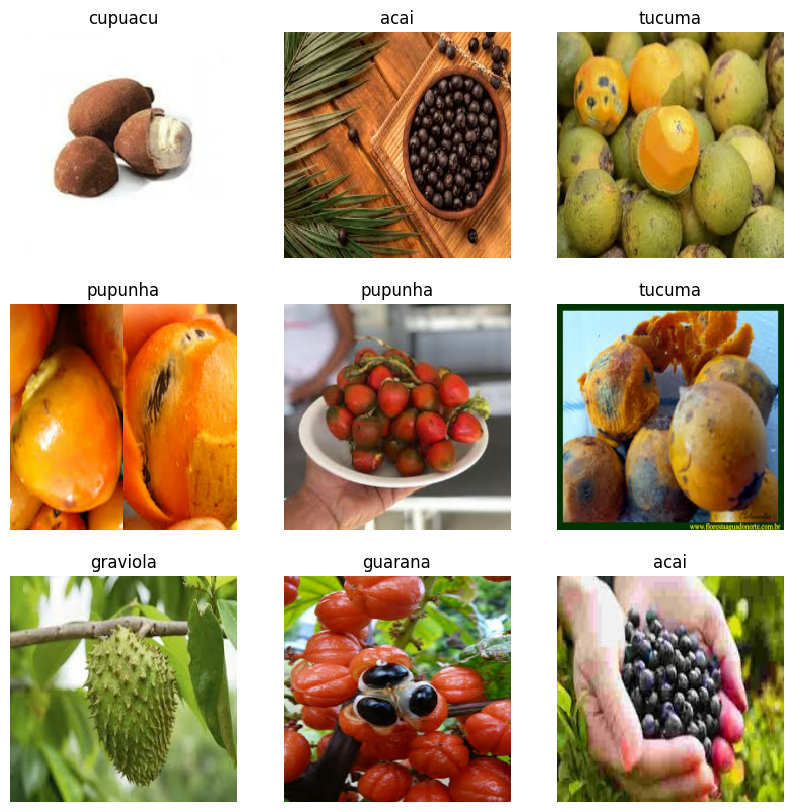

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function generates a CNN model with a set of predefined hyperparameters.

    Input Args:
    image_height[int]  = Height of an image.
    image_width[int]   = Width of an image.
    nchannels[int]     = Number of channels in image (e.g., 1 for grayscale, 3 for RGB).
    num_classes[int]   = Number of classes in dataset.

    Output Args:
    model -> A compiled CNN model.
    """

    model = tf.keras.Sequential([
        # Rescaling and input layer
        layers.Rescaling(1.0 / 255, input_shape=(image_height, image_width, nchannels)),

        # First Convolutional Block
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Second Convolutional Block
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Flattening Layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(units=128, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')  # Output layer for classification
    ])

    return model


img_height = 180
img_width = 180

In [33]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,609,094 (63.36 MB)

 Trainable params: 16,609,094 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

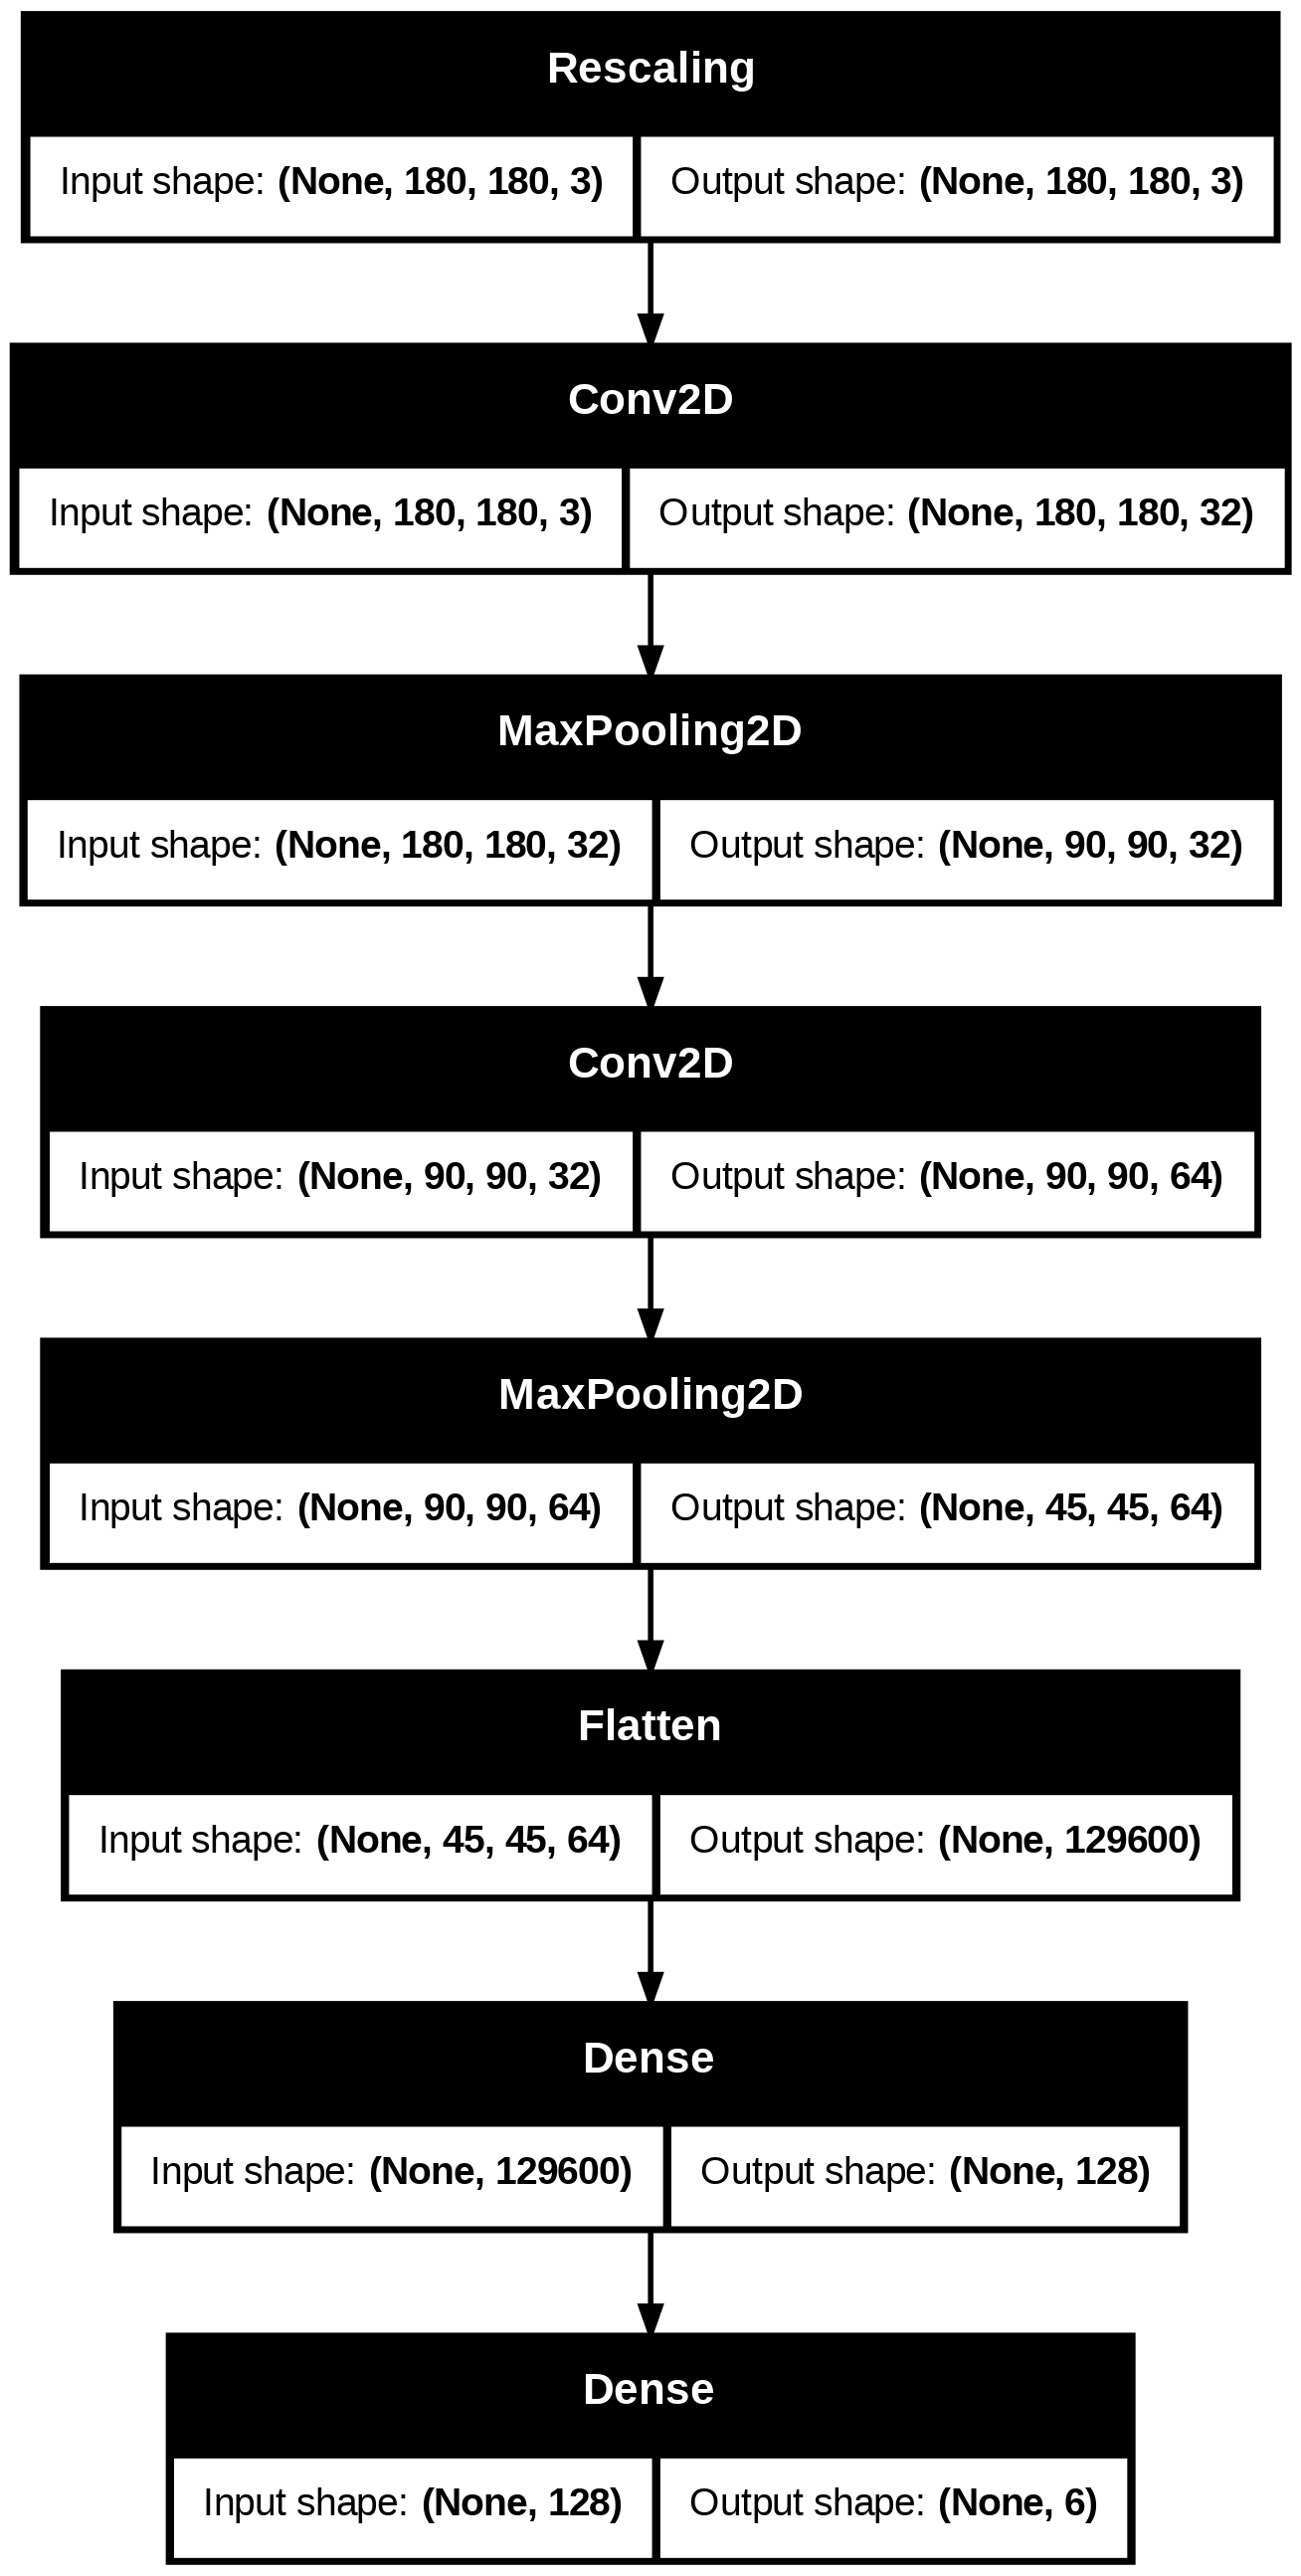

In [35]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [36]:
# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Loss function
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with default LR
    metrics=['accuracy']  # Track accuracy during training
)


In [44]:
model.compile(
    optimizer='adam',  # Adam optimizer (good default choice for CNNs)
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification with integer labels
    metrics=['accuracy']  # Track accuracy during training
)

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

def generate_model(image_height, image_width, nchannels, num_classes):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # Convolutional Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Convolutional Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Convolutional Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2,2)),

        # Instead of Flatten, use GlobalAveragePooling2D
        layers.GlobalAveragePooling2D(),

        # Fully Connected Layers
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output Layer
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if labels are one-hot encoded
        metrics=['accuracy']
    )

    return model

# Initialize model
image_height, image_width, nchannels, num_classes = 224, 224, 3, 10  # Adjust num_classes based on dataset
model = generate_model(image_height, image_width, nchannels, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Training the model (Ensure this part runs successfully first)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
    ]
)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.1467 - loss: 2.2786 - val_accuracy: 0.8333 - val_loss: 2.0230 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.1693 - loss: 2.1272 - val_accuracy: 0.8333 - val_loss: 1.7119 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.1450 - loss: 1.9752 - val_accuracy: 0.4444 - val_loss: 1.7114 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2726 - loss: 1.8057 - val_accuracy: 0.0556 - val_loss: 1.7792 - learning_rate: 0.0010
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1939 - loss: 1.7443
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2010 - loss: 1.7454 - val_accuracy: 0.0556 - val_loss: 2.0093 - learning_rate: 0.0010
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3060 - loss: 1.6937 - val_accuracy: 0.0556 - val_los

## Observe the Model Performance.


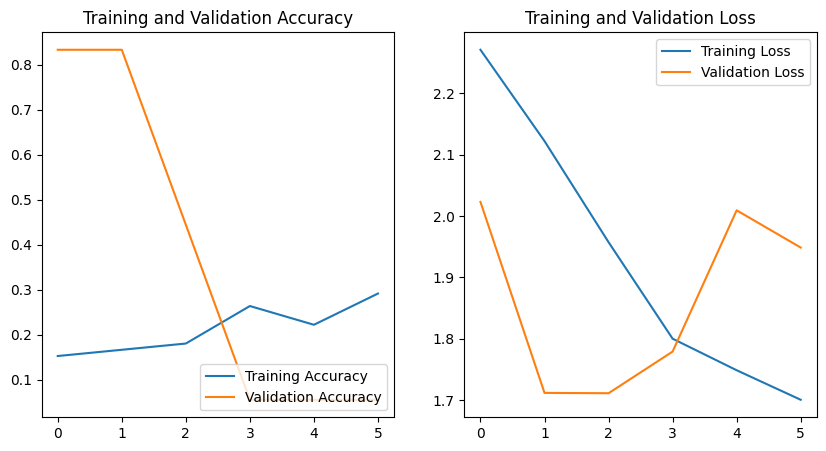

In [50]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Get actual number of epochs
epochs_range = range(len(acc))

plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.
